# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Carter Smith

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [11]:
import requests


file_name = 'ExtraPoint.html'
article_url = 'https://www.footballarchaeology.com/p/a-brief-history-of-footballs-extra-point'

def fetch_and_save_html(url, filename):
    try:
        # Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors

        # Write the HTML content to a file
        with open(f'{filename}', 'w', encoding='utf-8') as file:
            file.write(response.text)

        print(f"HTML content saved to {filename}")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

fetch_and_save_html(article_url,file_name)

HTML content saved to ExtraPoint.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [16]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup

def analyze_sentiment_with_spacy(file_path):
    try:
        # Load the spaCy language model
        nlp = spacy.load("en_core_web_sm")

        # Add the TextBlob sentiment analyzer to spaCy
        nlp.add_pipe("spacytextblob")

        # Read the HTML file
        with open(file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML and extract text
        soup = BeautifulSoup(html_content, 'html.parser')
        text = soup.get_text()

        # Process the text using spaCy
        doc = nlp(text)

        # Get the overall polarity score
        polarity = doc._.blob.polarity

        # Count the number of sentences
        sentence_count = len(list(doc.sents))

        # Print results
        print(f"Polarity score: {polarity}")
        print(f"Number of sentences: {sentence_count}")
    except Exception as e:
        print(f"An error occurred: {e}")

analyze_sentiment_with_spacy(file_name)

Polarity score: 0.08932968574635242
Number of sentences: 54


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [18]:
from collections import Counter

def analyze_frequent_tokens(file_path):
    try:
        # Load the spaCy language model
        nlp = spacy.load("en_core_web_sm")

        # Read the HTML file
        with open(file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML and extract text
        soup = BeautifulSoup(html_content, 'html.parser')
        text = soup.get_text()

        # Process the text using spaCy
        doc = nlp(text)

        # Extract tokens, converted to lowercase, filtering out stop words, punctuation, and spaces
        tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

        # Count token frequencies
        token_freq = Counter(tokens)

        # Get the 5 most common tokens
        most_common = token_freq.most_common(5)

        # Print results
        print("Top 5 Most Frequent Tokens:")
        for token, freq in most_common:
            print(f"Token: {token}, Frequency: {freq}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
analyze_frequent_tokens(file_name)

Top 5 Most Frequent Tokens:
Token: touchdown, Frequency: 18
Token: goal, Frequency: 18
Token: kick, Frequency: 16
Token: football, Frequency: 15
Token: point, Frequency: 14


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [19]:
def analyze_frequent_lemmas(file_path):
    try:
        # Load the spaCy language model
        nlp = spacy.load("en_core_web_sm")

        # Read the HTML file
        with open(file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML and extract text
        soup = BeautifulSoup(html_content, 'html.parser')
        text = soup.get_text()

        # Process the text using spaCy
        doc = nlp(text)

        # Extract lemmas, converted to lowercase, filtering out stop words, punctuation, and spaces
        lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

        # Count lemma frequencies
        lemma_freq = Counter(lemmas)

        # Get the 5 most common lemmas
        most_common = lemma_freq.most_common(5)

        # Print results
        print("Top 5 Most Frequent Lemmas:")
        for lemma, freq in most_common:
            print(f"Lemma: {lemma}, Frequency: {freq}")
    except Exception as e:
        print(f"An error occurred: {e}")

analyze_frequent_lemmas(file_name)

Top 5 Most Frequent Lemmas:
Lemma: kick, Frequency: 27
Lemma: goal, Frequency: 25
Lemma: point, Frequency: 24
Lemma: touchdown, Frequency: 21
Lemma: football, Frequency: 15


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

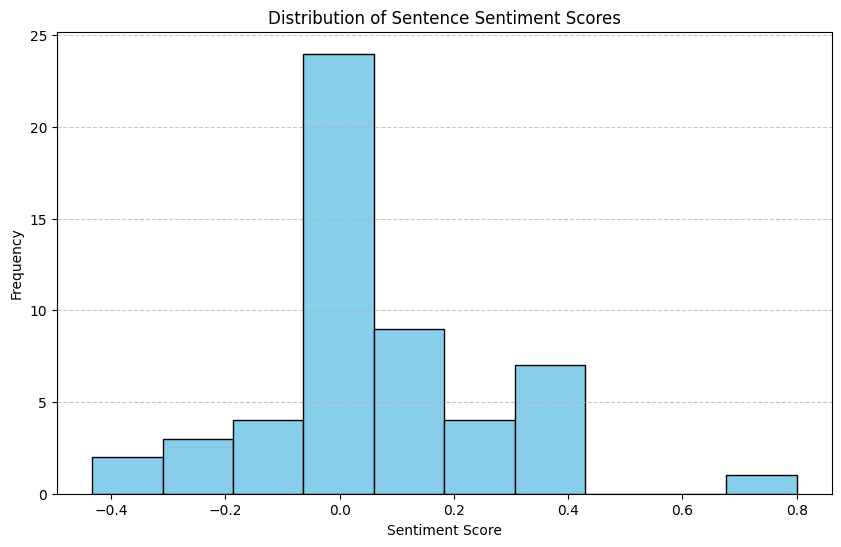

Sentence Scores:
Sentence 1: 0.08750000000000001
Sentence 2: -0.4333333333333333
Sentence 3: 0.07777777777777779
Sentence 4: 0.13333333333333333
Sentence 5: 0.11875
Sentence 6: 0.04999999999999999
Sentence 7: 0.2
Sentence 8: -0.15
Sentence 9: 0.0
Sentence 10: 0.3
Sentence 11: 0.0
Sentence 12: 0.16444444444444448
Sentence 13: 0.375
Sentence 14: 0.0
Sentence 15: -0.2
Sentence 16: 0.0
Sentence 17: 0.0
Sentence 18: 0.1514520202020202
Sentence 19: -0.1
Sentence 20: 0.0
Sentence 21: 0.13636363636363635
Sentence 22: 0.15000000000000002
Sentence 23: 0.0
Sentence 24: 0.05000000000000002
Sentence 25: 0.0
Sentence 26: 0.0
Sentence 27: -0.2625
Sentence 28: 0.4
Sentence 29: -0.4
Sentence 30: 0.39999999999999997
Sentence 31: 0.4
Sentence 32: -0.1
Sentence 33: 0.033333333333333354
Sentence 34: 0.0
Sentence 35: 0.0
Sentence 36: 0.05
Sentence 37: 0.23750000000000002
Sentence 38: 0.4
Sentence 39: 0.0
Sentence 40: 0.0
Sentence 41: 0.0
Sentence 42: 0.26666666666666666
Sentence 43: 0.0
Sentence 44: 0.05
Se

In [ ]:
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

def plot_sentence_scores(file_path):
    try:
        # Load the spaCy language model
        nlp = spacy.load("en_core_web_sm")

        # Add the TextBlob sentiment analyzer to spaCy (ensures the extension is registered)
        if "spacytextblob" not in nlp.pipe_names:
            nlp.add_pipe("spacytextblob", last=True)

        # Read the HTML file
        with open(file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML and extract text
        soup = BeautifulSoup(html_content, 'html.parser')
        text = soup.get_text()

        # Process the text using spaCy
        doc = nlp(text)

        # Compute sentiment scores for each sentence
        sentence_scores = [sent._.blob.polarity for sent in doc.sents]

        # Plot the histogram
        plt.figure(figsize=(10, 6))
        plt.hist(sentence_scores, bins=10, color='skyblue', edgecolor='black')
        plt.title("Distribution of Sentence Sentiment Scores")
        plt.xlabel("Sentiment Score")
        plt.ylabel("Frequency")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Print the sentence scores
        print("Sentence Scores:")
        for i, score in enumerate(sentence_scores, 1):
            print(f"Sentence {i}: {score}")

        # Most common range comment
        print("Analyze the histogram to determine the most common range.")
    except Exception as e:
        print(f"An error occurred: {e}")

plot_sentence_scores(file_name)

#0.0 is the most common polarity score for sentences. Most sentences fall between -0.4 and 0.4, with one outlier sentence(52) being at 0.8

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

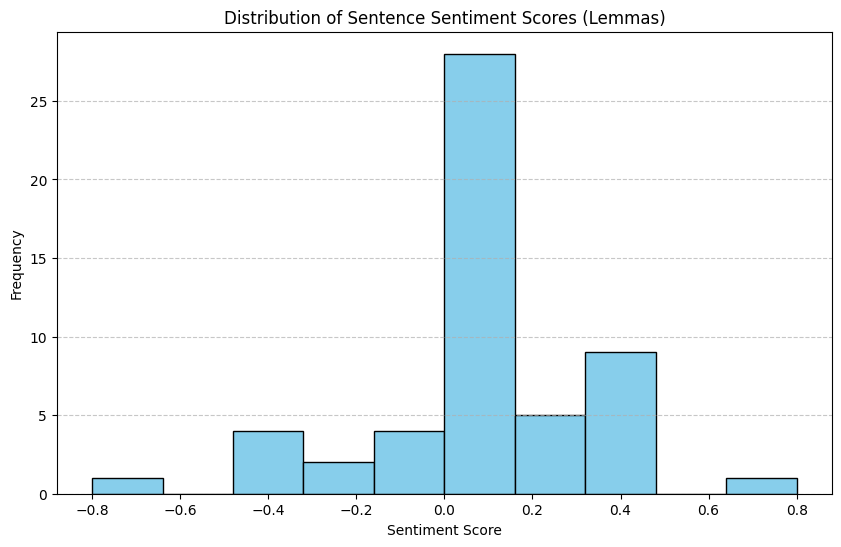

Lemma Sentence Scores:
Sentence 1: 0.05500000000000001
Sentence 2: -0.4333333333333333
Sentence 3: 0.1787878787878788
Sentence 4: 0.13333333333333333
Sentence 5: -0.00833333333333334
Sentence 6: 0.2
Sentence 7: 0.4
Sentence 8: 0.3
Sentence 9: 0.0
Sentence 10: 0.15
Sentence 11: -0.8
Sentence 12: 0.16
Sentence 13: 0.375
Sentence 14: 0.0
Sentence 15: -0.4
Sentence 16: 0.0
Sentence 17: 0.0
Sentence 18: 0.06628787878787878
Sentence 19: -0.2
Sentence 20: 0.0
Sentence 21: 0.13636363636363635
Sentence 22: -0.1
Sentence 23: 0.0
Sentence 24: 0.05000000000000002
Sentence 25: 0.4
Sentence 26: 0.0
Sentence 27: 0.0
Sentence 28: 0.4
Sentence 29: 0.0
Sentence 30: 0.39999999999999997
Sentence 31: 0.4
Sentence 32: 0.0
Sentence 33: -0.4333333333333333
Sentence 34: 0.1
Sentence 35: 0.0
Sentence 36: 0.04
Sentence 37: 0.23750000000000002
Sentence 38: 0.4
Sentence 39: 0.0
Sentence 40: 0.0
Sentence 41: 0.0
Sentence 42: -0.03333333333333335
Sentence 43: 0.0
Sentence 44: 0.05
Sentence 45: 0.375
Sentence 46: -0.

In [ ]:
def plot_lemma_sentence_scores(file_path):
    try:
        # Load the spaCy language model
        nlp = spacy.load("en_core_web_sm")

        # Add the TextBlob sentiment analyzer to spaCy (ensures the extension is registered)
        if "spacytextblob" not in nlp.pipe_names:
            nlp.add_pipe("spacytextblob", last=True)

        # Read the HTML file
        with open(file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML and extract text
        soup = BeautifulSoup(html_content, 'html.parser')
        text = soup.get_text()

        # Process the text using spaCy
        doc = nlp(text)

        # Extract sentences and compute scores using lemmas
        lemma_sentences = [
            " ".join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct])
            for sent in doc.sents
        ]
        lemma_scores = [nlp(sentence)._.blob.polarity for sentence in lemma_sentences]

        # Plot the histogram
        plt.figure(figsize=(10, 6))
        plt.hist(lemma_scores, bins=10, color='skyblue', edgecolor='black')
        plt.title("Distribution of Sentence Sentiment Scores (Lemmas)")
        plt.xlabel("Sentiment Score")
        plt.ylabel("Frequency")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Print the lemma sentence scores
        print("Lemma Sentence Scores:")
        for i, score in enumerate(lemma_scores, 1):
            print(f"Sentence {i}: {score}")

        # Most common range comment
        print("Analyze the histogram to determine the most common range.")
    except Exception as e:
        print(f"An error occurred: {e}")

plot_lemma_sentence_scores(file_name)

#the lemma sentence scores shows a very similar distribution except for the addition of an outlier at -0.8

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.05
* Cutoff Score (lemmas): 0.0

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [45]:
def create_summary(file_path, cutoff_score):
    try:
        # Load the spaCy language model
        nlp = spacy.load("en_core_web_sm")

        # Add the TextBlob sentiment analyzer to spaCy (ensures the extension is registered)
        if "spacytextblob" not in nlp.pipe_names:
            nlp.add_pipe("spacytextblob", last=True)

        # Read the HTML file
        with open(file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML and extract text
        soup = BeautifulSoup(html_content, 'html.parser')
        text = soup.get_text()

        # Process the text using spaCy
        doc = nlp(text)

        # Initialize an empty list to store sentences that meet the cutoff score
        sentence_list = []

        # Iterate over sentences and check their sentiment scores
        for idx, sent in enumerate(doc.sents):
            # Skip the first sentence by checking its index, (contained Metadata and other junk that was giving bad results.)
            if idx == 0:
                continue  

            # Get the sentiment score based on tokens (using spacytextblob)
            sentiment_score = sent._.blob.polarity

            # Check if the sentence is not empty, not just whitespace, and not just a newline
            if sentiment_score > cutoff_score and len(sent.text.strip()) > 20:  # Ensure it's not too short
                if sent.text.strip() and not sent.text.isspace():  # Exclude whitespace or newline only sentences
                    sentence_list.append(sent.text.strip())
        #print(sentence_list)
        # Generate the summary by joining the selected sentences
        summary = ' '.join(sentence_list)

        # Print the summary
        return summary
        
    except Exception as e:
        print(f"An error occurred: {e}")

summary = create_summary(file_name,0)
print(summary)

Those of us living in the 21st Century know the point(s) after touchdown are less important than the touchdown itself. The touchdown is primary and counts six points, while the point(s) after is secondary, worth one or two points, but that was not the case when football began. The Intercollegiate Football Association meeting of 1876, which established the rules of American football, adopted England’s Rugby Code almost verbatim, with the most significant exception being the game’s scoring. Under the rugby rules of the time, the team kicking the most goals won the game. Rugby did not differentiate goals kicked from the field (field goals) from those coming from a free kick following a try (or touchdown). Rather than keep rugby's rule, the IFA reduced the value of goals after touchdowns by making them worth one-fourth the value of a goal from field. Still, since football was less than a decade removed from rugby, kicking a goal from field (via drop kick) was the most highly valued play an

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [47]:
def analyze_sentiment(text):
    try:
        # Load the spaCy language model
        nlp = spacy.load("en_core_web_sm")

        # Add the TextBlob sentiment analyzer to spaCy
        nlp.add_pipe("spacytextblob")

        doc = nlp(text)

        # Get the overall polarity score
        polarity = doc._.blob.polarity

        # Count the number of sentences
        sentence_count = len(list(doc.sents))

        # Print results
        print(f"Polarity score: {polarity}")
        print(f"Number of sentences: {sentence_count}")
    except Exception as e:
        print(f"An error occurred: {e}")

analyze_sentiment(summary)

Polarity score: 0.18938471250971253
Number of sentences: 25


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [59]:
def create_summary_based_on_lemmas(file_path, cutoff_score):
    try:
        # Load the spaCy language model
        nlp = spacy.load("en_core_web_sm")

        # Add the TextBlob sentiment analyzer to spaCy (ensures the extension is registered)
        if "spacytextblob" not in nlp.pipe_names:
            nlp.add_pipe("spacytextblob", last=True)

        # Read the HTML file
        with open(file_path, 'r', encoding='utf-8') as file:
            html_content = file.read()

        # Parse the HTML and extract text
        soup = BeautifulSoup(html_content, 'html.parser')
        text = soup.get_text()

        # Process the text using spaCy
        doc = nlp(text)

        lemma_sentences = [
            " ".join([token.lemma_ for token in sent if not token.is_stop])
            for sent in doc.sents
        ]
        lemma_scores = [nlp(sentence)._.blob.polarity for sentence in lemma_sentences]

        sentence_list = []

        for idx, sent in enumerate(lemma_sentences):
            # Skip the first sentence by checking its index, (contained Metadata and other junk that was giving bad results.)
            if idx == 0:
                continue  
            if lemma_scores[idx] >cutoff_score:
                sentence_list.append(sent.strip())

        # Generate the summary by joining the selected sentences
        summary = ' '.join(sentence_list)

        return summary
        
    except Exception as e:
        print(f"An error occurred: {e}")
lemma_summary = create_summary_based_on_lemmas(file_name,0)
print(lemma_summary)


live 21st Century know point(s ) touchdown important touchdown . touchdown primary count point , point(s ) secondary , worth point , case football begin . rugby rule time , team kick goal win game . Rugby differentiate goal kick field ( field goal ) come free kick follow try ( touchdown ) . rugby , try ( touchdown ) worth point . rugby rule , IFA reduce value goal touchdown make worth - fourth value goal field . , football decade remove rugby , kick goal field ( drop kick ) highly value play earn point . touchdown follow successful goal touchdown play result point , establish precedent ability cross opponent goal line matter . originally , ball remain live miss goal touchdown , mean kicking team recover ball goal line touchdown field play , . change brother play Otterbein write Walter Camp idea new style goal field . placement kick common attempt field goal , goal touchdown free kick . free kick , player kicking team holder , lie ground . Princeton attempt drop kick point touchdown , f

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [60]:
analyze_sentiment(lemma_summary)

Polarity score: 0.213880266075388
Number of sentences: 23


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  
There is a difference in the scores, the lemma polarity score is higher than the standard text's polarity score, I think this may be due to the nlp losing some of the context of the original text and making 'Generalizations'

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?
The sentence summary is better than the lemmatized summary, the lemmatized text does not add any context or hold any benefit, the lemmatized summary does however contain 2 less sentences overall.